# ΗΥ360: Δεύτερο Μέρος Συνθετικής Εργασίας
## Τμήμα 1 | Εξερεύνηση του World Bank Dataset μέσω του Colaboratory (40 μονάδες)
---

### Υποδείξεις - διαβάστε τις πολύ προσεκτικά! - :

* Σιγουρευτείτε ότι διαβάσατε καλά τις οδηγίες σε κάθε κελί και κατανοήσατε τι υλοποιεί πριν το εκτελέσετε.
* Να θυμάστε ότι έχετε τη δυνατότητα να μεταφορτώνετε το αρχικό "σημειωματάριο" όποτε το χρειάζεστε.
* Μπορείτε να δημιουργείτε νέα κελιά για να τα χρησιμοποιείτε σε ελέγχους, εκσφαλμάτωση, εξερεύνηση κλπ. Μάλιστα προτείνουμε να το κάνετε! 
**Βεβαιωθείτε εντούτοις ότι η τελική απάντηση σε κάθε ερώτηση βρίσκεται στο _δικό της κελί_ και _προσδιορίζεται ρητά_**.
* Το Colaboratory δεν σας ειδοποιεί για τα bytes που θα καταναλώσει η εκτέλεση των SQL ερωτημάτων σας.  **Σιγουρευτείτε ότι ελέγχετε την κατανάλωση μέσω της διεπαφής (UI) του BigQuery πριν εκτελέσετε τα ερωτήματά σας στο Colaboratory!**
* Ακολουθείστε τις οδηγίες υποβολής.

## Μέλη της Ομάδας Εργασίας:
Παραθέστε τα ονοματεπώνυμα και τους ΑΜ των μελών της ομάδας στην ακόλουθη λίστα:

Aναγνωστάκης Εμμανουήλ 3618
Θεοκλήτου Σωτήρης 3645

## Ρυθμίσεις για το BigQuery και τις σχετικές εξαρτήσεις

Εκτελέστε τα δύο ακόλουθα κελιά (shift + enter) προκειμένου να πιστοποιήσετε την εργασία σας και να φορτώσετε τις απαιτούμενες βιβλιοθήκες. 

Προσέξτε ότι θα χρειαστεί να συμπληρώσετε τη μεταβλητή `project_id` στο πρώτο κελί με το Google Cloud Project ID που έχετε δημιουργήσει για τις ανάγκες της εργασίας σας.  Για να δείτε το project ID μεταβείτε στη σελίδα https://console.cloud.google.com/cloud-resource-manager.



In [0]:
# Εκτελέστε αυτό το κελί προκειμένου να πιστοποιήσετε την εργασία σας στο BigQuery.
from google.colab import auth
auth.authenticate_user()
project_id = "my-project-1509395052465"

In [0]:
# Βιβλιοθήκες που θα χρειαστείτε
import pandas as pd
import altair as alt

### Χρήση του BigQuery στο Collab

Τα σημειωματάρια στο Jupyter (στα οποία βασίζονται τα σημειωματάρια του Collab) χρησιμοποιούν τη ιδέα της "μαγείας".
Εάν γράψετε την ακόλουθη γραμμή στην κορυφή ενός κελιού με 'Κώδικα' :

```
%%bigquery --project $project_id variable # this is the key line
SELECT ....
FROM ...
```

το "%%" μετατρέπει το κελί σε κελί SQL. Ο πίνακας που παράγεται από το ερώτημα αποθηκεύεται στη μεταβλητή `variable`. Στη συνέχεια εάν γράψετε σε δεύτερο κελί:

```python
alt.Chart(variable).mark_line().encode(
...
)
```

μπορείτε να χρησιμοποιήσετε τη μεταβλητή ώστε να δημιουργήσετε ένα γράφημα! 

# Ενότητα 1 | Σχεδίαση του Σχήματος!

---





Ο οργανισμός World Bank συλλέγει και συγκεντρώνει δεδομένα από πολλές δημόσιες πηγές ανά τον κόσμο και τα δημοσιεύει για ηλεκτρονική πρόσβαση. Το BigQuery μας παραχωρεί τα δεδομένα αυτά για να τα επεξεργαστούμε, ενώ περιέχει ένα μεγάλο αριθμό από μετρικές (δείκτες) σχετικές με δραστηριότητες και συμπεράσματα για διάφορα έθνη. 

Για την εργασία αυτή θα χρησιμοποιήσουμε το δημόσιο σύνολο δεδομένων [`world_bank_health_population`](https://bigquery.cloud.google.com/dataset/bigquery-public-data:world_bank_health_population).

## Ερώτηση 1: Περιγράψτε το σύνολο δεδομένων World Bank (1 μονάδα)

Εάν έπρεπε να περιγράψετε το τρόπο με τον οποίο έχουν οργανωθεί τα δεδομένα στα σύνολα του World Bank (οποιοδήποτε από τα τέσσερα καθώς έχουν ίδια δομή), τι θα λέγατε; 
**Σημείωση:** Τα ερωτήματα που ακολουθούν αναφέρονται διεξοδικότερα στη δομή του συνόλου δεδομένων, επομένως εδώ ζητούμε μια επιγραμματική αναφορά. Θέλουμε τις εντυπώσεις σας - τι παρατηρήσατε; 

---
Παρατηρούμε, ότι τα tables country_summary και health_nutrition_population συνδέονται με το μοναδικό χαρακτηριστικό country_code, όπως και τα tables series_summary και series_times συνδέονται με το μοναδικό χαρακτηριστικό series_code. Και οι 4 πίνακες συνδέονται στον table country_series_definitions με αυτά τα δύο χαρακτηριστικά.

---

## Γνωριμία με το OKV, το Αντι-Σχήμα

---

Τα αρχικά **`OKV`** σημαίνουν `Object-Key-Value` [[1]](https://colab.research.google.com/drive/1sfBuCa4NTAxkJ--drwhF1sMizaq8qDJz#scrollTo=eDfk4D0-wpWf&line=4&uniqifier=1). Πρόκειται για ένα τρόπο αποθήκευσης δεδομένων ακριβώς αντίθετο από αυτόν που βασίζεται σε σχήματα: έχετε την ελευθερία να ορίσετε οποιοδήποτε γνώρισμα επιθυμείτε σε οποιοδήποτε αντικείμενο. Σκεφτείτε ότι φτιάχνετε ένα γιγαντιαίο πίνακα κατακερματισμού (10 δισ. γραμμές είναι λίγες σε αυτόν [[2]](https://colab.research.google.com/drive/1sfBuCa4NTAxkJ--drwhF1sMizaq8qDJz#scrollTo=eDfk4D0-wpWf&line=4&uniqifier=1)) για κάθε μεταβλητή αντικειμένου στο σύστημά σας. 



Ακολουθεί ένας τρόπος με τον οποίο θα μπορούσε να αναπαρασταθεί ένας τέτοιος πίνακας:


|  object  |             key          |  value  
|-------------|---------------------------|------
|    102    |        "name"         |  "John Watson"
|    103    |        "name"         |  "Sherlock Holmes"
|    102    |       "address"      |  "221B Baker Street, London, UK"
|    107    |        "name"         |  "Oprah Winfrey"
|    103    |       "address"      |  "221B Baker Street, London, UK"
|    102    |        "canes"        |  26
|    103    |  "cases_solved" |  60





Όπως παρατηρείτε, τα τρία αντικείμενα του πίνακα έχουν διαφορετικές "μορφές" (όρος που χρησιμοποιείται αντί για το "σχήμα" στις περιπτώσεις που δεν ακολουθείται ένα τυπικό σχήμα). 

Εάν θέλετε να μάθετε για κάποιο αντικείμενο θα πρέπει να κάνετε μια επερώτηση όπως παρακάτω :

```sql
SELECT key, value
FROM table
WHERE object = 102
```

Στη συνέχεια η συγχώνευση όλων των απαντήσεων θα σας δώσει τη συνολική πληροφορία για το αντικείμενο!


### Παρατηρήσεις
1.   Άλλες εκδοχές της ιδέας που συζητούμε ( χρήση τριών λέξεων για την αποθήκευση δεδομένων) περιλαμβάνουν τις: ID-Key-Value, Object-Property-Value, Entity-Attribute-Value, Entity-Property-Value, για τις οποίες υπάρχουν αντίστοιχα ακρωνύμια IKV, OPV κλπ.
2.   Ο λόγος ύπαρξης μεγάλου αριθμού γραμμών σε αποθήκες OKV, είναι ότι περιλαμβάνουν όλα τα κελιά ενός κανονικού πίνακα (που ακολουθεί κάποιο σχήμα).




### Επιπλέον μελέτη (Ενδεικτική)
* [Άρθρο ](https://en.wikipedia.org/wiki/Entity%E2%80%93attribute%E2%80%93value_model) στη Wikipedia  για τη συγκεκριμένη δομή αποθήκευσης

## Ερώτηση 2: Ασχολούμαστε με τα OKVs (6 μονάδες)

Συγκρίνετε τις αποθήκες OKV με τους "κλασσικούς" σχεσιακούς πίνακες.
Ποια είναι τα πλεονεκτήματά τους; Ποιες οι δυσκολίες τους; 
#### (Απαντήστε με 200 το πολύ λέξεις - προτείνουμε λίστα με κουκκίδες!)

### Υποδείξεις
* Το ακρωνύμιο **CRUD** ορίζει μια χρήσιμη αναφορά ελέγχου, με τα αρχικά του να αντιστοιχούν στις βασικές ενέργειες που εφαρμόζονται στα δεδομένα:  **Create**, **Read**, **Update**, **Delete**. Μπορείτε να δημιουργείτε/διαβάζετε /ενημερώνετε/διαγράφετε τιμές σε μια ΒΔ, ή στο σχήμα της (πχ. προσθήκη/διαγραφή ενός γνωρίσματος, αλλαγή του τύπου του κλπ). 

* Όταν σκέφτεστε για πλεονεκτήματα και μειονεκτήματα στο λογισμικό, ορισμένα κοινώς επιθυμητά χαρακτηριστικά είναι η επίδοση (χρόνος εκτέλεσης των επερωτήσεων), το αποτύπωμα στη μνήμη (όσο λιγότερη μνήμη χρησιμοποιείται, τόσο καλύτερα), η διατήρηση (εάν μπορεί η ΒΔ να προσαρμοστεί εύκολα στις απαιτήσεις των εφαρμογών) και η πολυπλοκότητα του κώδικα (εάν η σχεδίαση της ΒΔ ενθαρρύνει τη δημιουργία μεγάλων, δυσμεταχείριστων επερωτήσεων κάτι που μπορεί να οδηγήσει σε προγραμματιστικά λάθη λόγω πολυπλοκότητας). Η σύγκρισή σας μπορεί να αναφέρεται σε αυτά τα χαρακτηριστικά για καθεμιά από τις παραπάνω βασικές ενέργειες (CRUD) στις δυο περιπτώσεις οργάνωσης.

* Για τις επιδόσεις στις ΒΔ, χάριν της ερώτησης αυτής, μπορείτε να σκέφτεστε σε τρία επίπεδα:
  * Εντοπισμός: Έχετε μια τιμή κλειδιού ενός πίνακα και ψάχνετε μια γραμμή του (ή κάποιο υποσύνολό της). Θεωρήστε ότι έχει πλοκή O(1).
  * Σάρωση: Όταν πρέπει να εντοπίσετε γραμμές βάσει κριτηρίων (πχ, άνθρωποι ψηλότεροι από 1,80). Το ύψος δεν είναι κλειδί, κι έτσι πρέπει να ψάξετε όλες τις γραμμές του πίνακα. Θεωρήστε ότι έχει πλοκή O(N). Ανάλογα ενεργείτε όταν πρέπει να δώσετε τιμές σε ένα γνώρισμα σε πολλές γραμμές μαζί.
  * Σύζευξη: Όταν γίνεται σύζευξη πινάκων, δημιουργείται ένα καρτεσιανό γινόμενο συνόλων.Εάν ο ένας πίνακας έχει Ν γραμμές και ανάλογα συμβαίνει και με τον δεύτερο, η σύζευξη θεωρείται ότι έχει πλοκή O(N^2).
  


![alt text](https://)
---

---Kαταρχάς να πούμε, ότι ο τρόπος που θα δουλεύουμε είναι με μία απλή hash function, δηλαδή μία συνάρτηση, που παίρνει ένα index του πίνακα και το μετατρέπει σε ένα object στο οποίο θα πάμε να εκτελέσουμε την επιμέρους λειτουργία.

---Η ***σάρωση*** μπορεί να ψάξει και με διαφορετικά κριτήρια (στοιχεία με ίδια values κλπ). Η ***σάρωση*** αν γίνεται σε Ο(1) λέγεται ***εντοπισμός***.

---Ας ξεκινήσουμε με  τη λειτουργία **CREATE** σε έναν OKV. Σε αυτή τη λειτουργία πρέπει να ***εντοπίσουμε*** το τελευταίο record στο heap. Αν το συγκεκριμένο block δεν έχει χώρο, ένα νέο μπλοκ πρέπει να χρησιμοποιηθεί. Και στις δύο περιπτώσεις, το μπλοκ πρέπει να γράφεται σε δευτερεύοντα χώρο μετά το **CREATE**. Οπότε παίρνει 2 block accesses συνολικά. Ο ***εντοπισμός*** αυτός εκτελείται σε O(1).

---Όσον αφορά το **READ**, πρέπει να ***σαρώσουμε*** n/2R blocks κατά μέσο όρο. Άμα δεν υπάρχει στοιχείο με το συγκεκριμένο κλειδί, θα ***σαρώσουμε*** n/R blocks κατά μέσο όρο. Ουσιαστικά πολυπλοκότητα Ο(Ν).

---Για το **UPDATE** πρέπει πάλι να ***σαρώσουμε*** n/2R blocks για να βρούμε το στοιχείο με το απαιτούμενο κλειδί και άλλο 1 για να γράψουμε το νέο value. Πολυπλοκότητα Ο(Ν).

---Για το **DELETE** το ίδιο. ***Σάρωση***  n/2R blocks για να βρούμε το στοιχείο με το απαιτούμενο κλειδί και άλλο 1 για να το διαγράψουμε κατά μέσο όρο. Αν το στοιχείο δεν υπάρχει θα ***σαρώσουμε*** n/R μπλοκς.




## Κάτι ακόμα - Ονόματα γνωρισμάτων




Όπως έχετε μάθει, ο πλεονασμός δεδομένων στους πίνακες είναι ανεπιθύμητος, καθώς, εάν θέλετε να αλλάξετε μια τιμή, πρέπει να ενημερώσετε όλα τα σημεία στα οποία εμφανίζεται (πολύ ακριβή ενέργεια - θυμηθείτε ότι στο μοντέλο OKV ένας πίνακας έχει πολύ περισσότερες γραμμές απ' ότι στο σχεσιακό ). Κάτι τέτοιο είναι επίσης γνωστό ως **ανωμαλία ενημέρωσης**.

Πώς χειρίζεστε αυτό το θέμα;  Είναι απλό: με τη χρήση πίνακα γνωρισμάτων:

```sql
# Schema (με βάση κάποια σύνταξη): 
Property(id, name)
Data(id, key, value)
```

Έτσι θα αντικαθιστούσαμε τον παραπάνω πίνακα με τον:

Πίνακας γνωρισμάτων:

  
| id | name |
|-----|----------|
| 1  | "name"
| 2  | "address"
| 3  | "canes"
| 4  | "cases_solved"


Πίνακας δεδομένων:

|    id    |  pid   |  value
--------|-------------|-------------
|  102   |  1      |  "John Watson"
|  103   |  1      |  "Sherlock Holmes"
|  102   |  2      |  "221B Baker Street, London, UK"
|  107   |  1      |  "Oprah Winfrey"
|  103   |  2      |  "221B Baker Street, London, UK"
|  102   |  3      |  26
|  103   |  4      |  60


### Ερώτηση 3: Επανερχόμαστε ... (2 μονάδες)
Επαναλάβετε τη σύγκρισή σας για τον πίνακα γνωρισμάτων - σε τι διευκολύνει η αλλαγή που προτάθηκε παραπάνω και τι είναι ακόμη δύσκολο να γίνει;

Παρακαλώ σχολιάστε μόνο τις διαφορές - μην επαναλάβετε την ανάλυση.

---
Καταρχάς έχουμε πολύ περισσότερα μοναδικά χαρακτηριστικά και μεγαλύτερη διάκριση δεδομένων σε ένα hash table(δεν έχουμε υποομαδοποιήσεις). Έχουμε την λειτουργία του εντοπισμού στα hash tables δηλαδή κάνουμε πράγματα σε Ο(1) μέση της hash function kai αυτό σημαίνει τεράστια εξοικονόμηση χρόνο, γιατί όλα στον πίνακα γνωρισμάτων γίνονται σε O(N). Eπίσης, ο hash table είναι πολύ πιο προσιτός και πολύ πιο έυκολος στη χρήση, χώρια που είναι απολύτως αποδοτικότερος!

---

## Ένα ακόμη πράγμα - Οι τύποι! 

Στην `SQL`, κάθε στήλη πρέπει να έχει έναν τύπο [[1]](https://colab.research.google.com/drive/1sfBuCa4NTAxkJ--drwhF1sMizaq8qDJz#scrollTo=ANzXvTCVVpV5&line=3&uniqifier=1). Έτσι όταν άρχισαν να αναμιγνύονται σε μια στήλη *string* με  *int* τιμές, αυτό ήταν απλοποίηση. 

Υπάρχουν πολλές σχεδιαστικές επιλογές για την επίλυση αυτού του ζητήματος  - δείτε την επόμενη ερώτηση όπου συζητούνται ορισμένες από τις επιλογές αυτές.


#### Σημείωση
Υπάρχουν ΒΔ που δεν έχουν το χαρακτηριστικό που παρουσιάστηκε πιο πάνω: να μπορεί να καταχωρούνται τιμές οποιουδήποτε τύπου στην τρίτη στήλη. Εάν απορείτε γιατί όλοι επιθυμούν αυτό το χαρακτηριστικό, σκεφτείτε τη διαφορά μεταξύ γλωσσών προγραμματισμού με στατικά και δυναμικά ορισμένους τύπους (πχ Java vs Python). Ανάλογα αντισταθμίζεται η επιλογή μιας ΒΔ που το σχήμα της έχει γνωρίσματα καθορισμένων εξαρχής τύπων απ' ότι άλλης ΒΔ που το σχήμα της έχει γνωρίσματα  ακαθόριστων τύπων. 

## Ερώτηση 4: "Διάλογος μεταξύ φίλων" (6 μονάδες)



(ΥΓ - Το ρωτούν συχνά σε συνεντεύξεις μηχανικών λογισμικού!).

Ένας καλός σας φίλος προσπαθεί να υλοποιήσει μια αποθήκη OKV σε SQL και συναντά το εμπόδιο που περιγράψαμε προηγουμένως. Ας θεωρήσουμε απλουστευτικά ότι ενδιαφέρεται να αποθηκεύει μόνο *string* και * int* τιμές (μπορεί να επεκταθεί και για άλλους τύπους).

Προτείνεται η ακόλουθη λύση (αν και δε φαίνεται, υποθέστε ότι ο πίνακας γνωρισμάτων - για τα pid -  υπάρχει επίσης):

id    | pid | string_value       | int_value
------|-------|---------------------------|--------
102 | 1   | "Sherlock Holmes" | null
103 | 1   | "John Watson"     | null
102 | 3   | null                        | 60


Επεξηγηματικά: εάν η τιμή έχει τύπο *string*, συμπληρώνεται κατάλληλα η στήλη `string_value` και στη στήλη `int_value` μπαίνει null και ανάλογα για τιμές τύπου *int*. 


### α) Τι λάθος εντοπίζετε στον παραπάνω πίνακα; (2 μονάδες)

Εάν έπρεπε να κρίνετε την πρόταση αυτή, τι θα λέγατε στον φίλο σας; Ποια η δυσκολία και τα ανεπιθύμητα χαρακτηριστικά της;

---
Έχουμε τσάμπα κελιά στον πίνακα με τιμή null τα οποία μας τρώνε αποθηκευτικό χώρο και μπορεί να μας δυσκολέψουν και στην διάσχιση του πίνακα.

---


### β) Η αντιπρότασή σας (2 μονάδες)

Προτείνετε μια άλλη σχεδίαση στην οποία αντιμετωπίζονται προβλήματα που περιγράψατε στην προηγούμενη απάντησή σας (υπόδειξη: ίσως χρειαστεί περισσότερους από έναν πίνακες).


[link text](https://)
---
Θα έχουμε 2 πίνακες. Έναν με τα string_value και έναν με τα int_value.

---


### γ)  Αντι-κριτική! (2 μονάδες)

Ο φίλος σας εξετάζει τη δική σας πρόταση και τη σχολιάζει.Σε ποιες δυσκολίες και ανεπιθύμητα χαρακτηριστικά της θα αναφερθεί;

---
Το πιο λογικό είναι να πει, ότι θα φάμε παραπάνω χώρο και πάλι για νέες διευθύνσεις .Το θεμα είναι με το να ξεχωρίσουμε τους πίνακες,έχουμε πολύ καλύτερη σχεδίαση και ευκολότερη προσπέλαση, οπότε θυσιάζουμε μνήμη για αποδοτικότητα και ταχύτητα. Επίσης οι πίνακες θα έχουν κοινά χαρακτηριστικά για να μπορούν να συνδυασθούν.

---

## Εφαρμόστε αυτά που μάθατε από τα προηγούμενα

Τα δεδομένα της world bank έχουν τη δομή OKV... με μια μικρή διαφορά. Οι πίνακες που περιέχουν τα δεδομένα έχουν λίγο πολύ την ακόλουθη μορφή:

```
object | key | year | value
```

όπου `object` = κωδικός χώρας & `key` = κωδικός δείκτη (τι μετρήθηκε).

Υπάρχουν λίγα ακόμη γνωρίσματα (περιγραφές για object και key), αλλά συνολικά η δομή είναι OKV.

Με τη γνώση που αποκτήσατε από τα παραπάνω, δείτε ξανά το σχήμα και εντοπίστε και άλλες ιδιότητες της δομής αποθήκευσης key-value που προσδιορίσαμε. 


## Ερώτηση 5: Κατανόηση του σχήματος (3 μονάδες)

Καθένα από τα παρακάτω παίρνει 1 μονάδα.


### α)  Ποιος πίνακας, μεταξύ των τεσσάρων που περιλαμβάνει το σύνολο δεδομένων της world bank, έχει το ρόλο του πίνακα γνωρισμάτων;

---
Ο πίνακας country_series_definitions έχει το ρόλο του πίνακα γνωρισμάτων με γνωρίσματα country_code και series_code.

---

### β) Ποιος πίνακας περιέχει παραπάνω πληροφορία για τα "αντικείμενα"  (σε συμφωνία με τη δομή OKV);


---
Οι πίνακες country_summary και series_summary έχουν πολλές παραπάνω πληροφορίες απο το σχήμα object | key | year | value.

---


### γ) Ποιο είναι το κλειδί ("key"), σε συμφωνία με τη δομή OKV, του πίνακα `health_nutrition_population`;

Είναι το indicator_code.

## Ερώτηση 6: Θεωρία σχεδίασης (12 μονάδες)

Δώστε το δικό σας σχήμα για τα δεδομένα της world bank! Στόχος είναι να φανταστείτε πώς θα μπορείτε να απαντάτε σε ερωτήματα όπως τα παρακάτω:

* Πώς εξελίσσεται στο χρόνο η ανάλυση του πληθυσμού στις ΗΠΑ σε ανδρικό και γυναικείο ανά δεκαετία (0-9, 10-19, 20-29, κλπ);
* Παρατηρείται δημογραφική γήρανση ή ανανέωση στην Ελλάδα;
* Πώς διαφοροποιείται η ανάλυση του πληθυσμού των ΗΠΑ και της Ελλάδας (ή άλλων χωρών); 
* Ποιο είναι το προσδόκιμο ζωής σε σχέση με τις ιατρικές δαπάνες για όλες τις χώρες του κόσμου;
* Σε ποιες περιοχές εξαπλώνεται ο HIV; Φτιάξτε εικόνα της κατανομής των ασθενών με AIDS για περιοχές με υψηλά ποσοστά της ασθένειας.  

#### Επιπλέον απαιτήσεις

* Ανεξάρτητα από το σχήμα που θα προτείνετε, θα πρέπει να είναι σαφής ο τρόπος εισαγωγής δεδομένων σε διάφορα επίπεδα: πλειάδες (γραμμές πινάκων), γνωρίσματα (στήλες πινάκων) και πίνακες.
  * πχ, εάν αρχικά δεν αποθηκεύατε το κατά κεφαλήν ΑΕΠ, πώς θα το προσθέσετε στον κατάλληλο πίνακα;




#### Υποδείξεις:

Η πραγματικότητα ξεπερνάει κάθε φαντασία, επομένως κατά πάσα πιθανότητα και τις σχεδιαστικές σας επιλογές! Θα θέλαμε οι ΒΔ να ανταποκρίνονται στα γεγονότα από τα οποία δημιουργούνται τα δεδομένα τους. Θυμηθείτε τις ενέργειες CRUD (create, read, update, delete)! Τι μπορούμε να κάνουμε στις περιπτώσεις που:
* Μια στατιστική αποδειχθεί λανθασμένη και χρήζει αναθεώρησης;
* Χρειάζεται να προσθέσετε δεδομένα από όλες τις χώρες, τη στιγμή που δημιουργούνται, με το τέλος του 2018;
* Μια χώρα διχοτομείται μετά από επανάσταση;
* Μια χώρα αλλάζει το όνομά της;
* Χρειάζεται να αποθηκεύετε πολύ μικρά ποσοστά (πχ επικράτηση σπάνιων ασθενειών);
* Υπάρχουν στατιστικές που εφαρμόζονται μόνο σε ορισμένες χώρες (πχ, ποσοστό ανθρώπων που τηρούν το ραμαζάνι);
* Απροσδόκητα απαιτείται η αποθήκευση δεδομένων με μεγαλύτερο ρυθμό (ας πούμε εβομαδιαία ή μηνιαία, αντί ετησίων);

Είναι μάλλον απίθανο να συμπεριφέρεται καλά η σχεδίασή σας σε όλες τις παραπάνω περιπτώσεις (και πολλές ακόμη άλλες που θα σκεφτείτε), αλλά δεν είναι πρόβλημα! Δεν υπάρχει τέλεια σχεδίαση. Εντούτοις, θέλουμε να μας δείξετε ότι κατανοείτε πώς αντισταθμίζονται οι σχεδιαστικές επιλογές και τι σημαίνει αυτό για τις εφαρμογές που "χτίζετε" πάνω από τις ΒΔ σας.

### α) Ποιες είναι οι οντότητες στο σχήμα σας; (2 μονάδες)


---
*Δώστε εδώ την απάντησή σας*

---

### β) Ποιες είναι οι μεταξύ τους σχέσεις; (Δε χρειάζεται να σχεδιάσετε ένα τέλειο διάγραμμα Οντοτήτων/Συσχετίσεων - αρκεί ένα βασικό που θα συνοδεύεται από λίστα με τις πληθικότητες για κάθε ζεύγος σχέσων  '1 - 1', '1 - Ν' and 'Ν - Ν' ). (2 μονάδες)



---
*Δώστε εδώ την απάντησή σας*

---

### γ) Δώστε σχέδιο των πινάκων της ΒΔ σας (σαν αυτούς που εμφανίστηκαν προηγουμένως), και σημειώστε με ξεκάθαρο τρόπο ποια γνωρίσματα συνθέτουν το πρωτεύον κλειδί σε καθένα, καθώς επίσης και ποια γνωρίσματα είναι κλειδιά άλλων πινάκων (ξένα κλειδιά). (3 μονάδες)


---
*Δώστε εδώ την απάντησή σας*

*Παράδειγμα σχεδίου πίνακα. Οι τιμές που θα περιέχει θα είναι δείγματα από το σύνολο world bank. Χρειαζόμαστε 2 με 3 γραμμές για να πάρουμε μια ιδέα σχετικά με το τι αποθηκεύεται  σε κάθε στήλη:*


Column A | Column B | Column C
----------------|-----------------|-----------------
   value 1  |   value 2   |   value 3
   value 4  |   value 5   |   value 6


---

### δ) Καταγράψτε τις  (ελάχιστες) συναρτησιακές εξαρτήσεις κάθε πίνακα. (2 μονάδες)


---
*Δώστε εδώ την απάντησή σας*

---

### ε) Σχολιάστε τη σχεδίασή σας - Για ποιες περιπτώσεις είναι καλή/κακή; *Τι σταθμίσατε κατά τη διάρκεια λήψης των σχεδιαστικών σας επιλογών;* (3 μονάδες)


---
*Δώστε εδώ την απάντησή σας*

---

# Ενότητα 2 | Εξοικειωθείτε με την οπτικοποίηση
---


Στην ενότητα αυτή θα απαντήσετε σε ερωτήσεις όπως κάνατε στο 1ο μέρος της συνθετικής εργασίας (με χρήση SQL). Η διαφορά είναι ότι οι απαντήσεις σας θα οπτικοποιούνται. Μέρος της άσκησής σας είναι να σκεφτείτε ποιο είδος απεικόνισης (διάγραμμα, εικόνα κλπ) θα αποδώσει καλύτερα την απάντηση, καθώς επίσης και ποια δεδομένα ("μετρικές/δείκτες") θα χρησιμοποιήσετε για την απάντηση μια συγκεκριμένης ερώτησης.

Επικεντρωνόμαστε σε οπτικοποιήσεις καθώς πρόκειται για πρωτεύουσα μέθοδο κατανόησης και ερμηνείας της φύσης των δεδομένων. Ιδιαίτερα για τα "Μεγάλα Δεδομένα" που γίνεται λόγος στις μέρες μας, μια εικόνα αξίζει 1 εκατομμύριο γραμμές πίνακα :) .

Για μια γρήγορη ματιά στο τι μπορούμε να κάνουμε, δείτε το  [Gapminder](https://www.gapminder.org/tools). Αποτελεί εργαλείο για επαγγελματικού επιπέδου οπτικοποίηση μετρικών από δεδομένα, που επιπλέον είναι διαδραστικό! Μπορείτε να αναζητήσετε αξιόλογες TED ομιλίες στις οποίες χρησιμοποιείται το Gapminder για την αναπαράσταση παγκόσμιων στατιστικών.

Εάν χρειάζεται να ελέγξετε "απαντήσεις" για κάποια σχεσιακά δεδομένα (δείτε: scatterplot), ψάξτε τα στο Gapminder και βεβαιωθείτε ότι πήρατε μια απάντηση που μοιάζει σωστή. Όπως αναφέρθηκε, μέρος της εργασίας είναι η επιλογή των σωστών "δεικτών/μετρικών". Μπορείτε να "παίξετε" στο Gapminder με διαφορετικές περιπτώσεις πριν καταλήξετε στην επιλογή σας!

## Γενικές οδηγίες
* Για καθεμιά από τις ερωτήσεις που ακολουθούν θα πρέπει να συμπληρώσετε τουλάχιστον δύο κελιά - ένα SQL στο οποίο εκτελείται το ερώτημά σας (και αποθηκεύει το αποτέλεσμα σε πλαίσιο δεδομένων), και ένα οπτικοποίησης όπου κατασκευάζετε το διάγραμμα αναπαράστασης του αποτελέσματος. Παρακαλώ έχετε κατά νου ότι ο χειρισμός των δεδομένων θα γίνει **αποκλειστικά** με SQL. Επίσης δεν πρέπει να χρησιμοποιήσετε τη βιβλιοθήκη `pandas` ή άλλη βιβλιοθήκη της python για να κάνετε [μασάζ στα δεδομένα](https://stackoverflow.com/questions/577892/what-does-data-massage-mean) σας. 
* Φτιάξτε τα διαγράμματά σας ευανάγνωστα - ετικέτες στους άξονες, ξεκάθαρα διακριτικά σημάδια, ευδιάκριτα σημεία/γραμμές/σχήματα, κλίμακες κλπ.
* Ψάξτε αρκετά τους δείκτες που θα χρησιμοποιήσετε. Εν τέλει μας ενδιαφέρει το διάγραμμα που θα προκύψει να έχει τη ζητούμενη πληροφορία - ακόμη κι αν την εμφανίζει με διαφορετικό τρόπο (πχ πληθυσμό ανά δεκαετία αντί για πληθυσμό ανά ηλικιακή ζώνη). Εντούτοις, κάποιοι δείκτες θα οδηγήσουν σε ευκολότερες λύσεις: για τούτο προτείνουμε να ξοδέψετε χρόνο για να εντοπίσετε αυτούς, που ο υπολογισμός τους θα γίνει με πιο άμεσο τρόπο. 

## Βιβλιοθήκες οπτικοποίησης
Τα σημειωματάρια του Colaboratory έχουν προεγκατεστημένη μια βιβλιοθήκη οπτικοποίησης που ονομάζεται **Altair**. 
Μπορείτε να δείτε την τεκμηρίωσή της στον σύνδεσμο: https://altair-viz.github.io/ 

Υπάρχουν διαθέσιμα κάποια βασικά αποσπάσματα κώδικα (code snippets) στη μεσαία επιλογή του μενού στα αριστερά των σημειωματαρίων. 
Περιμένουμε από εσάς να διαβάσετε την τεκμηρίωση και να καταλάβετε με ποιον τρόπο θα χρησιμοποιήσετε τη βιβλιοθήκη οπτικοποίησης. Η ενασχόλησή σας θα σας βοηθήσει τόσο στο Τμήμα 2 του δεύτερου μέρους της εργασίας, όσο και σε μελλοντική ενασχόλησή σας με ανάλυση δεδομένων.




## Δείκτες/Μετρικές

Οι δείκτες του συνόλου δεδομένων World Bank είναι διαθέσιμοι και αναζητήσιμοι [εδώ](https://data.worldbank.org/indicator?tab=all). 

Είναι πιθανό να χρειαστεί να αναζητήσετε τους κωδικούς των δεικτών και τα πρότυπα κωδικών δεικτών (indicator codes - indicator code patterns) προκειμένου να εξάγετε τα απαραίτητα δεδομένα γι' αυτό το τμήμα της άσκησης. Όταν λοιπόν εντοπίσετε τον κατάλληλο δείκτη θα βρίσκεστε σε μια σελίδα με διεύθυνση της μορφής: `https://data.worldbank.org/indicator/XXXXXXXXX`. Τα X αντιστοιχούν στον `κωδικό του δείκτη (indicator_code)`. Για παράδειγμα στη σελίδα `https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS`, το `SH.XPD.CHEX.GD.ZS` είναι ο `κωδικός δείκτη` για τον οποίο θα κάνετε αναζητήσεις (επερωτήσεις) στο σύνολο δεδομένων.

Εναλλακτικά, μπορείτε να κάνετε ερωτήματα με λέξεις κλειδιά απευθείας στο BigQuery (είναι ευκολότερη διαδικασία για κάποιες απλούστερες γραφικές απεικονίσεις).

Πολλές από τις ερωτήσεις είναι  _σκοπίμως_ ανοιχτές αφήνοντάς σας να αποφασίσετε ποιοι είναι οι καταλληλότεροι δείκτες (σπουδαία ικανότητα στην ανάλυση δεδομένων). Σημαντική παράμετρο στη διαμόρφωση και απάντηση ερωτημάτων είναι να σκέφτεστε τα "τυφλά σημεία" που έχουν οι δείκτες που θα χρησιμοποιήσετε.
Για παράδειγμα, έστω ότι απεικονίζετε τα ευρώ του ξοδεύονται σε σχέση με το μορφωτικό επίπεδο για διάφορες χώρες. Δεν θα ήταν καλύτερο να μετρήσετε τις δαπάνες εν γένει ή το κεφάλαιο ως ποσοστό του ΑΕΠ; Ποια είναι τα αντισταθμιστικά οφέλη από τη χρήση των διαφορετικών δεικτών;

## Ερώτηση 7 (3 μονάδες)


Αρχικά θα βρούμε κάτι στοιχειώδες - θα αναπαραστήσουμε γραφικά τον πληθυσμό της Ελλάδας ως διάγραμμα περιοχής σώρευσης (stacked area chart), για διάφορες ηλικιακές ομάδες που έχουν καταχωρηθεί στο σύνολο δεδομένων (0-14, 15-64, 65+). Ο x άξονας θα παριστάνει το `έτος(year)` και ο y τον `πληθυσμό (population)`, για τις παραπάνω ηλικιακές ομάδες. Το άθροισμα όλων των περιοχών θα αντιπροσωπεύει το συνολικό πληθυσμό της Ελλάδας για ένα συγκεκριμένο έτος. 

 **Υπόδειξη:** Οι συναρτήσεις REGEX του BigQuery μπορεί να είναι χρήσιμες. Ελέγξτε εάν θελήσετε τη συνάρτηση regex που θα φτιάξετε [εδώ](https://regex101.com/) πριν τη χρησιμοποιήσετε στο BigQuery για να βεβαιωθείτε ότι "δουλεύει".

In [0]:
%%bigquery --project $project_id q7
SELECT country_name country, indicator_name age, indicator_code indicator_code, value population, year year 
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
WHERE country_name = 'Greece' AND (indicator_name = 'Population ages 00-14, total' OR indicator_name = 'Population ages 15-64, total' OR indicator_name = 'Population ages 65 and above, total');


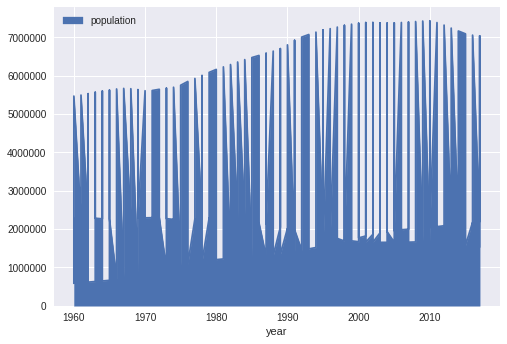

In [23]:
q7.plot(kind='area', x='year', y='population');

## Ερώτηση 8 (3 μονάδες)

Στην Ελλάδα συνολικά έχουμε γήρανση ή ανανέωση του πληθυσμού; Φτιάξτε κανονικοποιημένο διάγραμμα περιοχής σώρευσης ώστε να "δείτε" την απάντηση στην ερώτηση!

In [20]:
%%bigquery --project $project_id q8

WITH population_0014 AS(SELECT sum(value) AS pop_0014_total FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` WHERE country_name = "Greece" AND indicator_name = 'Population ages 00-14, total'),
population_1564 AS(SELECT sum(value) AS pop_1564_total FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` WHERE country_name = "Greece" AND indicator_name = 'Population ages 15-64, total'),
population_65plus AS(SELECT sum(value) AS pop_65plus_total FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` WHERE country_name = "Greece" AND indicator_name = 'Population ages 65 and above, total')
SELECT (pop_0014_total+pop_1564_total) population_young_total, pop_65plus_total population_old_total FROM population_0014, population_1564, population_65plus

,population_young_total,population_old_total
0,496256701.0,81514178.0


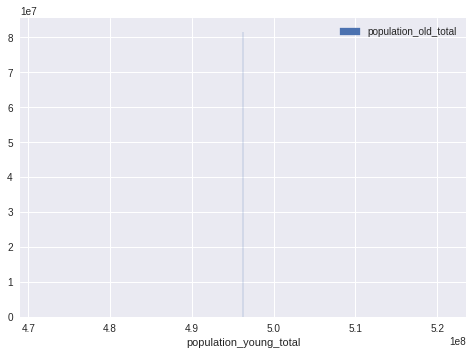

In [24]:
q8.plot(kind='area', x='population_young_total', y='population_old_total');

## Ερώτηση 9 (4 μονάδες)

Ας φτιάξουμε μια γραφική παράσταση ακριβώς όπως το Gapminder ως απάντηση στην ερώτηση: "Ποιοι έχουν καλύτερη υγεία σε σχέση με τα χρήματα που ξοδεύουν;" Αναπαραστήσετε λοιπόν τα `χρήματα που δαπανώνται στην υγεία (money spent on healthcare)` ως προς το `προσδόκιμο ζωής (life expectancy)`. "Παίξτε" με το Gapminder για να βρείτε τους κατάλληλους δείκτες (υπάρχουν διαφορετικές λύσεις) .

Φτιάξτε διάγραμμα φυσαλίδων (bubble plot) όπου το μέγεθος της φυσαλίδας αντιστοιχεί στον πληθυσμό της χώρας, το χρώμα της φυσαλίδας στη γεωγραφική περιοχή που ανήκει η χώρα και υπάρχει ολισθητής (slider) για αλλαγή στα έτη (σημείωση: διαλέξτε με λογικό τρόπο τα χρονικά διαστήματα). Συμπεριλάβετε επίσης έναν τρόπο για να δείχνετε ποια χώρα είναι κάθε φυσαλίδα (ίσως ένα εργαλείο υπομνήσεων - [tooltip](https://en.wikipedia.org/wiki/Tooltip)).

In [0]:
%%bigquery --project $project_id q9

# YOUR QUERY HERE

In [0]:
# YOUR PLOT CODE HERE